In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"

  # IPython 7.14 deprecated set_matplotlib_formats from IPython
  try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
  except ImportError:
    # Fall back to deprecated location for older IPython versions
    from IPython.display import set_matplotlib_formats
    
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L2hvbWUvbWlrZW5ndXllbi9wcm9qZWN0L3RpZHlmaW5hbmNl'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/opt/anaconda3/lib/python3.13/importlib/_bootstrap.py": 1749745530.584952, "/opt/anaconda3/lib/python3.13/importlib/_bootstrap_external.py": 1749745530.5809522, "/opt/anaconda3/lib/python3.13/zipimport.py": 1749745530.2849557, "/opt/anaconda3/lib/python3.13/codecs.py": 1749745530.164957, "/opt/anaconda3/lib/python3.13/encodings/aliases.py": 1749745530.3809545, "/opt/anaconda3/lib/python3.13/encodings/__init__.py": 1749745530.428954, "/opt/anaconda3/lib/python3.13/encodings/utf_8.py": 1749745530.4809532, "/opt/anaconda3/lib/python3.13/abc.py": 1749745530.1569571, "/opt/anaconda3/lib/python3.13/io.py": 1749745530.2049568, "/opt/anaconda3/lib/python3.13/stat.py": 1749745530.256956, "/opt/anaconda3/lib/python3.13/_collections_abc.py": 1749745530.168957, "/opt/anaconda3/lib/python3.13/genericpath.py": 1749745530.1929567, "/opt/anaconda3/lib/python3.13/posixpath.py": 1749745530.2289565, "/opt/anaconda3/lib/python3.13/os.py": 1749745530.2209566, "/opt/anaconda3/lib/python3.13/_sitebuiltins.

In [2]:
import pandas as pd
import numpy as np
import tidyfinance as tf
import sqlite3

from plotnine import *
from mizani.formatters import comma_format, percent_format
from datetime import datetime
tidy_finance = sqlite3.connect(database="data/tidy_finance_python.sqlite")

In [3]:
start_date = "01/01/1960"
end_date = "12/31/2024"

In [4]:
import pandas as pd
from io import BytesIO
import datetime as dt

import os
import boto3
from botocore.client import Config

class ConnectMinio:
    def __init__(self):
        self.MINIO_ENDPOINT = os.environ["MINIO_ENDPOINT"]
        self.MINIO_ACCESS_KEY = os.environ["MINIO_ACCESS_KEY"]
        self.MINIO_SECRET_KEY = os.environ["MINIO_SECRET_KEY"]
        self.REGION = os.getenv("MINIO_REGION", "us-east-1")

        self.s3 = boto3.client(
            "s3",
            endpoint_url=self.MINIO_ENDPOINT,
            aws_access_key_id=self.MINIO_ACCESS_KEY,
            aws_secret_access_key=self.MINIO_SECRET_KEY,
            region_name=self.REGION,
            config=Config(signature_version="s3v4"),
        )

    def test_connection(self):
        resp = self.s3.list_buckets()
        print("Connected. Buckets:")
        for b in resp.get("Buckets", []):
            print(" -", b["Name"])


conn = ConnectMinio()
s3 = conn.s3
conn.test_connection()

bucket_name = os.environ["MINIO_BUCKET"]

paths = [
    "fundamental_annual_1767674486317/fundamental_annual_1.xlsx",
    "fundamental_annual_1767674486317/fundamental_annual_2.xlsx",
    "fundamental_annual_1767674486317/fundamental_annual_3.xlsx",
]

dfs = []
for key in paths:
    obj = s3.get_object(Bucket=bucket_name, Key=key)
    df_tmp = pd.read_excel(BytesIO(obj["Body"].read()))
    dfs.append(df_tmp)

df_company_fundamental = pd.concat(dfs, ignore_index=True)

Connected. Buckets:
 - dsteam-data
 - rawbctc


/home/mikenguyen/project/tidyfinance/.venv/lib/python3.13/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default


/home/mikenguyen/project/tidyfinance/.venv/lib/python3.13/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default


/home/mikenguyen/project/tidyfinance/.venv/lib/python3.13/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default


In [5]:
df = df_company_fundamental.copy()

# core keys
df["symbol"] = df["symbol"].astype(str).str.upper().str.strip()
df["year"] = pd.to_numeric(df["year"], errors="coerce").astype("Int64")

# drop rows with missing keys
df = df.dropna(subset=["symbol", "year"])

# if some numeric columns are objects, force numeric for the ones we will use
need = [
    "total_asset",
    "total_equity",
    "total_liabilities",
    "total_current_liabilities",
    "is_net_revenue",
    "is_cogs",
    "is_manage_expense",
    "is_interest_expense",
    "na_tax_deferred",
    "nl_tax_deferred",
    "e_preferred_stock",
    "capex",
    "total_cfo",
    "is_eat",
    "total_current_asset", 
    "ca_cce", 
    "total_equity", 
    "cfo_interest_expense",
    "ca_total_inventory", 
    "ca_acc_receiv",
    # The is_net_business_profit field captures the core profitability of a company's business activities before accounting for "other" non-core incomes and expenses, and before corporate income tax.
    "is_net_business_profit"
]
for c in need:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

# Keep the row with the most non missing fields.
df["_non_missing"] = df.notna().sum(axis=1)

df = (
    df.sort_values(["symbol", "year", "_non_missing"])
      .drop_duplicates(subset=["symbol", "year"], keep="last")
      .drop(columns="_non_missing")
      .reset_index(drop=True)
)

print("Remaining duplicates:",
      df.duplicated(["symbol", "year"]).sum())

Remaining duplicates: 0


In [6]:
# preferably use Tax ID as Identifer
# ---- Firm identifier and fiscal date ----
df["datadate"] = pd.to_datetime(df["year"].astype(str) + "-12-31")  # Fiscal year-end date

# ---- Core balance sheet ----
df["at"]  = df["total_asset"]                                      # Total assets
df["act"] = df["total_current_asset"] # Total Current Assets

df["lt"]  = df["total_liabilities"]                                 # Total liabilities
df["lct"] = df["total_current_liabilities"] # Total Current Liabilities
df["seq"] = df["total_equity"]                                      # Stockholders' equity
df["ceq"] = df["e_equity"] if "e_equity" in df.columns else np.nan  # Common equity (fallback)

# ---- Deferred taxes ----
df["txditc"] = df["na_tax_deferred"] if "na_tax_deferred" in df.columns else 0  # Deferred tax assets
df["txdb"]   = df["nl_tax_deferred"] if "nl_tax_deferred" in df.columns else 0  # Deferred tax liabilities
df["itcb"]   = 0                                                                # Investment tax credit (rare, set 0)

# ---- Preferred stock (Compustat has multiple versions, we map one) ----
pref = df["e_preferred_stock"] if "e_preferred_stock" in df.columns else 0
df["pstk"]   = pref
df["pstkrv"] = pref
df["pstkl"]  = pref

# ---- Income statement ----
df["sale"] = df["is_net_revenue"]                                                # Sales
df["cogs"] = df["is_cogs"] if "is_cogs" in df.columns else 0                    # Cost of goods sold
df["xsga"] = df["is_manage_expense"] if "is_manage_expense" in df.columns else 0# SG&A proxy
df["xint"] = df["is_interest_expense"] if "is_interest_expense" in df.columns else 0  # Interest expense

# ---- Cash flow and investment ----
df["oancf"] = df["total_cfo"] if "total_cfo" in df.columns else np.nan  # Operating cash flow
df["capx"]  = df["capex"] if "capex" in df.columns else np.nan          # Capital expenditures

comp_vn = df

comp_vn.head()

,symbol,year,total_current_asset,ca_fin,ca_cce,ca_cash,ca_cash_inbank,ca_cash_attransit,ca_cash_equivalent,ca_fin_invest,...,itcb,pstk,pstkrv,pstkl,sale,cogs,xsga,xint,oancf,capx
0,A32,2016,3.432787e+11,NaN,1.397735e+11,1.006804e+10,NaN,NaN,1.297055e+11,0.0,...,0,NaN,NaN,NaN,6.292595e+11,5.636144e+11,3.108361e+10,0.0,-3.127942e+10,2.369143e+10
1,A32,2017,3.741267e+11,NaN,1.456583e+11,5.095282e+10,NaN,NaN,9.470550e+10,0.0,...,0,NaN,NaN,NaN,6.118207e+11,5.462587e+11,2.972820e+10,0.0,-6.679452e+09,1.598215e+10
2,A32,2018,3.358630e+11,NaN,5.829081e+10,1.229081e+10,NaN,NaN,4.600000e+10,0.0,...,0,NaN,NaN,NaN,6.461948e+11,5.837470e+11,1.852045e+10,0.0,5.224003e+10,1.405200e+10
3,A32,2019,2.987680e+11,NaN,6.051375e+10,4.451375e+10,NaN,NaN,1.600000e+10,0.0,...,0,NaN,NaN,NaN,6.914857e+11,6.092057e+11,3.032093e+10,0.0,1.120983e+10,1.296578e+10
4,A32,2020,3.566913e+11,NaN,4.435908e+10,2.235908e+10,NaN,NaN,2.200000e+10,0.0,...,0,NaN,NaN,NaN,7.285810e+11,6.489849e+11,3.222692e+10,0.0,4.279751e+09,5.433554e+09


In [7]:
# Keep only firm-years with core fundamentals present

# Required for most accounting ratios
req = ["at", "lt", "seq", "sale"]

comp_vn = comp_vn.dropna(subset=req)
comp_vn = comp_vn[comp_vn["at"] > 0]          # assets must be positive
comp_vn = comp_vn[comp_vn["sale"] >= 0]       # sales cannot be negative

# Quick diagnostics
print("Rows:", len(comp_vn))
print("Firms:", comp_vn["symbol"].nunique())
print("Years:", comp_vn["datadate"].dt.year.min(), "-", comp_vn["datadate"].dt.year.max())

Rows: 20091
Firms: 1502
Years: 1998 - 2023


In [8]:
comp_vn = (comp_vn
  .assign(
    be=lambda x: 
      (x["seq"].combine_first(x["ceq"]+x["pstk"])
       .combine_first(x["at"]-x["lt"])+
       x["txditc"].combine_first(x["txdb"]+x["itcb"]).fillna(0)-
       x["pstkrv"].combine_first(x["pstkl"])
       .combine_first(x["pstk"]).fillna(0))
  )
  .assign(
    be=lambda x: x["be"].apply(lambda y: np.nan if y <= 0 else y)
  )
  .assign(
    op=lambda x: 
      ((x["sale"]-x["cogs"].fillna(0)- 
        x["xsga"].fillna(0)-x["xint"].fillna(0))/x["be"])
  )
)

In [9]:
comp_vn = (comp_vn
  .assign(year=lambda x: pd.DatetimeIndex(x["datadate"]).year)
  .sort_values("datadate")
  .groupby(["symbol", "year"])
  .tail(1)
  .reset_index(drop=True)
)

In [10]:
comp_vn_lag = (comp_vn
  .get(["symbol", "year", "at"])
  .assign(year=lambda x: x["year"]+1)
  .rename(columns={"at": "at_lag"})
)

comp_vn = (comp_vn
  .merge(comp_vn_lag, how="left", on=["symbol", "year"])
  .assign(inv=lambda x: x["at"]/x["at_lag"]-1)
  .assign(inv=lambda x: np.where(x["at_lag"] <= 0, np.nan, x["inv"]))
)

In [11]:
comp_vn = comp_vn.assign(
    total_debt = lambda x: (
        x["cl_loan"].fillna(0) + 
        x["cl_finlease"].fillna(0) + 
        x["cl_due_long_debt"].fillna(0) + 
        x["nl_loan"].fillna(0) + 
        x["nl_finlease"].fillna(0)
    ), 
    selling_general_and_administrative_expenses = lambda x: (
        x["is_cos_of_sales"].fillna(0) + x["is_manage_expense"].fillna(0)
    )
)

In [12]:
#| output: false
(comp_vn
  .to_sql(name="comp_vn", 
          con=tidy_finance, 
          if_exists="replace",
          index=False)
)

20091

In [13]:
import pandas as pd
from io import BytesIO
import datetime as dt

import os
import boto3
from botocore.client import Config

class ConnectMinio:
    def __init__(self):
        self.MINIO_ENDPOINT = os.environ["MINIO_ENDPOINT"]
        self.MINIO_ACCESS_KEY = os.environ["MINIO_ACCESS_KEY"]
        self.MINIO_SECRET_KEY = os.environ["MINIO_SECRET_KEY"]
        self.REGION = os.getenv("MINIO_REGION", "us-east-1")

        self.s3 = boto3.client(
            "s3",
            endpoint_url=self.MINIO_ENDPOINT,
            aws_access_key_id=self.MINIO_ACCESS_KEY,
            aws_secret_access_key=self.MINIO_SECRET_KEY,
            region_name=self.REGION,
            config=Config(signature_version="s3v4"),
        )

    def test_connection(self):
        resp = self.s3.list_buckets()
        print("Connected. Buckets:")
        for b in resp.get("Buckets", []):
            print(" -", b["Name"])


conn = ConnectMinio()
s3 = conn.s3
conn.test_connection()

bucket_name = os.environ["MINIO_BUCKET"]

prices = pd.read_csv(
    BytesIO(
        s3.get_object(
            Bucket=bucket_name,
            Key="historycal_price/dataset_historical_price.csv"
        )["Body"].read()
    ),
    low_memory=False
)

prices["date"] = pd.to_datetime(prices["date"])

prices["adjusted_close"] = prices["close_price"] * prices["adj_ratio"]

prices = prices.rename(columns={
    "vol_total": "volume",
    "open_price": "open",
    "low_price": "low",
    "high_price": "high",
    "close_price": "close"
})

prices = prices.sort_values(["symbol", "date"])

Connected. Buckets:
 - dsteam-data
 - rawbctc


In [14]:
prices = prices.sort_values(["symbol", "date"])

prices["ret"] = (
    prices.groupby("symbol")["adjusted_close"]
    .pct_change()
)

# Remove impossible crashes beyond -100 percent
prices["ret"] = prices["ret"].clip(lower=-0.99)

In [15]:
# 1. Calculate the Share Count Proxy from Annual Fundamentals
# df represents your fundamental_annual dataset
df["shrout"] = (
    df["is_shareholders_eat"] / df["basic_eps"]
)

# 2. Merge with Daily Prices
# We join on 'symbol' and 'year' so every daily row in 'prices' 
# receives the share count corresponding to that fiscal year.
prices = prices.merge(
    df[["symbol", "year", "shrout"]],
    on=["symbol", "year"],
    how="left"
)

# 3. Calculate Daily Market Cap
# Market Cap = Daily Close Price * Annual Shares Outstanding
# We use 'close' (unadjusted) to reflect the actual market value.
prices["mktcap"] = prices["close"] * prices["shrout"]

# 4. Filter and Scale
# scales values to millions for readability
prices["mktcap"] = (prices["mktcap"] / 1000000).replace(0, np.nan)

In [16]:
# Resample to Monthly Frequency
# We group by symbol and resample the date to Month End (ME).
# .last() picks the final available data point for each month.
prices_monthly = (
    prices.sort_values(["symbol", "date"])
    .groupby("symbol")
    .resample("ME", on="date")
    .last()
)

# After .last(), 'symbol' is index level 0 and 'date' is index level 1.
# We remove 'symbol' and 'date' from the index to make them regular columns.
prices_monthly = prices_monthly.drop(columns=["symbol", "date"], errors="ignore").reset_index()

In [17]:
# 3. Lagged Market Capitalization
# We calculate the market cap at t-1 to use for weighting returns at t.
prices_monthly["mktcap_lag"] = (
    prices_monthly.groupby("symbol")["mktcap"]
    .shift(1)
)

In [18]:
# remove rows missing returns or capitalization data.
prices_monthly = (
    prices_monthly
    .dropna(subset=["ret", "mktcap", "mktcap_lag"])
)

In [19]:
#| eval: false

def map_vn_exchange(row):
    # This assumes you have an exchange column or can derive it from the symbol
    # Adjust the logic based on your specific metadata availability.
    if hasattr(row, 'exchange_code'):
        if row.exchange_code == "HOSE": return "NYSE_Equiv"
        if row.exchange_code == "HNX": return "AMEX_Equiv"
    return "Other"

In [20]:
# Create a date range covering your prices_monthly sample
all_dates = pd.date_range(
    start=prices_monthly['date'].min(), 
    end=prices_monthly['date'].max(), 
    freq='ME'
)

# Professional Proxy: 4% Annualized (0.04)
# Monthly rate = 0.04 / 12
annual_rf = 0.04
monthly_rf = annual_rf / 12

rf_monthly = pd.DataFrame({
    'date': all_dates,
    'risk_free': monthly_rf
})
  
prices_monthly = (prices_monthly
  # we don't have Fama-French data for Vietnam
  .merge(rf_monthly, how="left", on="date")
  .assign(ret_excess=lambda x: x["ret"]-x["risk_free"])
  .assign(ret_excess=lambda x: x["ret_excess"].clip(lower=-1))
  # .drop(columns=["risk_free"])
)

# Clean the infinite values before replication
prices_monthly = prices_monthly.replace([np.inf, -np.inf], np.nan).dropna(subset=['ret_excess'])

In [21]:
# Check for non-finite values (NaN or Inf)
print("Missing or Infinite Values:")
print(prices_monthly[['ret_excess', 'mktcap_lag']].isna().sum())
print(np.isinf(prices_monthly['ret_excess']).sum())

# Basic summary statistics to catch outliers
print("\nRet_excess Summary Statistics:")
print(prices_monthly['ret_excess'].describe())

Missing or Infinite Values:
ret_excess    0
mktcap_lag    0
dtype: int64
0

Ret_excess Summary Statistics:
count    165468.000000
mean         -0.001458
std           0.041601
min          -0.993333
25%          -0.006044
50%          -0.003333
75%           0.002764
max           4.139524
Name: ret_excess, dtype: float64


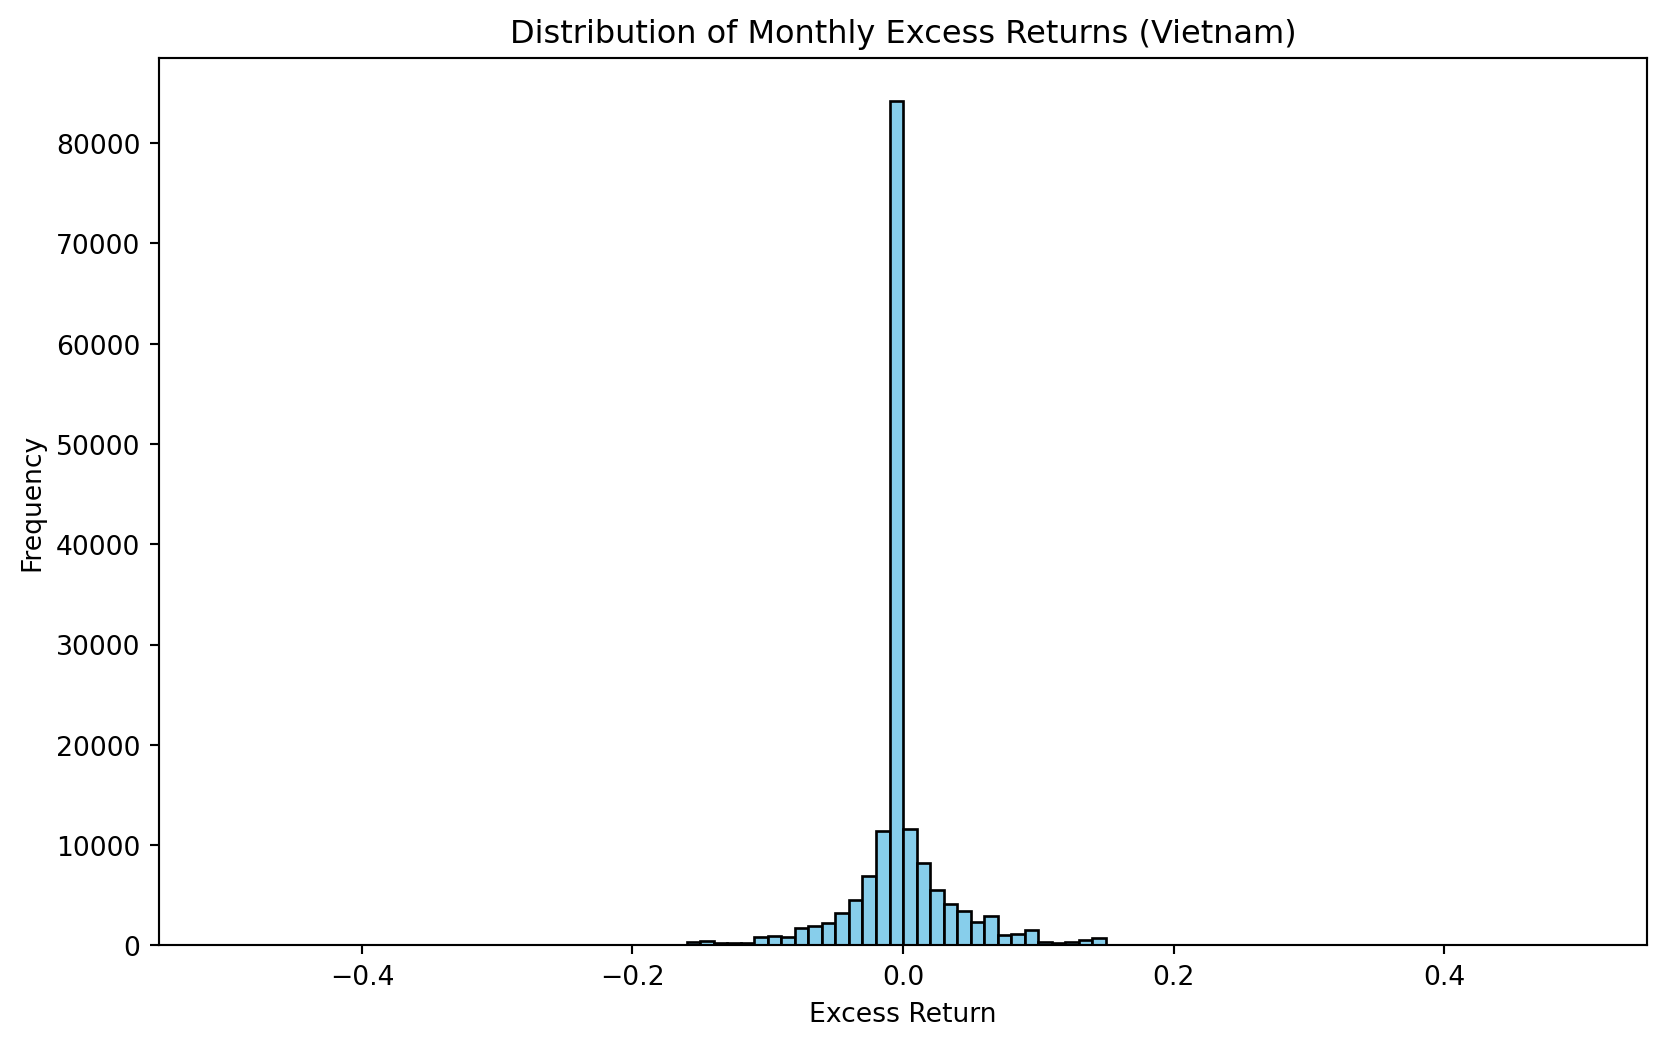

In [22]:
import matplotlib.pyplot as plt

# Clean data for plotting
plot_data = prices_monthly['ret_excess'].dropna()
plot_data = plot_data[np.isfinite(plot_data)]

# Histogram with fixed range
plt.figure(figsize=(10, 6))
plt.hist(plot_data, bins=100, range=(-0.5, 0.5), color='skyblue', edgecolor='black')
plt.title('Distribution of Monthly Excess Returns (Vietnam)')
plt.xlabel('Excess Return')
plt.ylabel('Frequency')
plt.show()

In [23]:
prices_monthly = (prices_monthly
  .dropna(subset=["ret_excess", "mktcap", "mktcap_lag"])
)

In [24]:
#| output: false
(prices_monthly
  .to_sql(name="prices_monthly", 
          con=tidy_finance, 
          if_exists="replace",
          index=False)
)

165468

In [25]:
#| label: fig-211
#| eval: false
#| fig-cap: The figure shows the monthly number of stocks in the Stock sample listed at each of the Vietnam exchanges.
#| fig-alt: 'Title: Monthly number of securities by listing exchange. The figure shows a line chart with the number of securities by listing exchange.'
securities_per_exchange = (prices_monthly
  .groupby(["exchange", "date"])
  .size()
  .reset_index(name="n")
)

securities_per_exchange_figure = (
  ggplot(
    securities_per_exchange, 
    aes(x="date", y="n", color="exchange", linetype="exchange")
  )
  + geom_line()
  + labs(
      x="", y="", color="", linetype="",
      title="Monthly number of securities by listing exchange"
    )
  + scale_x_datetime(date_breaks="10 years", date_labels="%Y")
  + scale_y_continuous(labels=comma_format())
)

securities_per_exchange_figure.show()

In [26]:
#| label: fig-212
#| eval: false
#| fig-cap: The figure shows the monthly market capitalization by listing exchange.
#| fig-alt: 'Title: Monthly market cap by listing exchange. The figure shows a line chart of the total market capitalization of all stocks aggregated by the listing exchange, with years on the horizontal axis and the corresponding market capitalization on the vertical axis.'
cpi_monthly = pd.read_sql_query(
  sql="SELECT * FROM cpi_monthly",
  con=tidy_finance,
  parse_dates={"date"}
)

market_cap_per_exchange = (prices_monthly
  .merge(cpi_monthly, how="left", on="date")
  .groupby(["date", "exchange"])
  .apply(
    lambda group: pd.Series({
      "mktcap": group["mktcap"].sum()/group["cpi"].mean()
    })
  )
  .reset_index()
)

market_cap_per_exchange_figure = (
  ggplot(
    market_cap_per_exchange, 
    aes(x="date", y="mktcap/1000", color="exchange", linetype="exchange")
  )
  + geom_line()
  + labs(
      x="", y="", color="", linetype="",
      title="Monthly market cap by listing exchange"
    )
  + scale_x_datetime(date_breaks="10 years", date_labels="%Y")
  + scale_y_continuous(labels=comma_format())
)
market_cap_per_exchange_figure.show()

In [27]:
#| label: fig-213
#| eval: false
#| fig-cap: The figure shows the monthly number of stocks in the Stock sample associated with different industries.
#| fig-alt: 'Title: Monthly number of securities by industry. The figure shows a line chart of the number of securities by industry with years on the horizontal axis and the corresponding number on the vertical axis.'
securities_per_industry = (prices_monthly
  .groupby(["industry", "date"])
  .size()
  .reset_index(name="n")
)

linetypes = ["-", "--", "-.", ":"]
n_industries = securities_per_industry["industry"].nunique()

securities_per_industry_figure = (
  ggplot(
    securities_per_industry, 
    aes(x="date", y="n", color="industry", linetype="industry")
  )
  + geom_line()
  + labs(
      x="", y="", color="", linetype="",
      title="Monthly number of securities by industry"
    )
  + scale_x_datetime(date_breaks="10 years", date_labels="%Y")
  + scale_y_continuous(labels=comma_format())
  + scale_linetype_manual(
      values=[linetypes[l % len(linetypes)] for l in range(n_industries)]
    ) 
)
securities_per_industry_figure.show()

In [28]:
#| label: fig-214
#| eval: false
#| fig-cap: The figure shows the total Market capitalization.
#| fig-alt: 'Title: Monthly total market cap by industry. The figure shows a line chart of total market capitalization of all stocks in the Stock sample aggregated by industry with years on the horizontal axis and the corresponding market capitalization on the vertical axis. Stocks in the manufacturing sector have always had the highest market valuation. The figure shows a general upwards trend during the most recent past.'
market_cap_per_industry = (prices_monthly
  .merge(cpi_monthly, how="left", on="date")
  .groupby(["date", "industry"])
  .apply(
    lambda group: pd.Series({
      "mktcap": (group["mktcap"].sum()/group["cpi"].mean())
    })
  )
  .reset_index()
)

market_cap_per_industry_figure = (
  ggplot(
    market_cap_per_industry, 
    aes(x="date", y="mktcap/1000", color="industry", linetype="industry")
  )
  + geom_line()
  + labs(
      x="", y="", color="", linetype="",
      title="Monthly market cap by industry in billions of Dec 2024 USD"
    )
  + scale_x_datetime(date_breaks="10 years", date_labels="%Y")
  + scale_y_continuous(labels=comma_format())
  + scale_linetype_manual(
      values=[linetypes[l % len(linetypes)] for l in range(n_industries)]
    ) 
)
market_cap_per_industry_figure.show()

In [29]:
#| output: false
#| eval: false
factors_ff3_daily = pd.read_sql(
  sql="SELECT * FROM factors_ff3_daily", 
  con=tidy_finance,
  parse_dates={"date"}
)

permnos = pd.read_sql(
  sql="SELECT DISTINCT permno FROM crsp.stksecurityinfohist", 
  con=DataCore,
  dtype={"permno": int}
)

permnos = list(permnos["permno"].astype(str))
  
batch_size = 500
batches = np.ceil(len(permnos)/batch_size).astype(int)

for j in range(1, batches+1):  
    
  permno_batch = permnos[
    ((j-1)*batch_size):(min(j*batch_size, len(permnos)))
  ]
  
  permno_batch_formatted = (
    ", ".join(f"'{permno}'" for permno in permno_batch)
  )
  permno_string = f"({permno_batch_formatted})"
  
  crsp_daily_sub_query = (
    "SELECT dsf.permno, dlycaldt AS date, dlyret AS ret "
      "FROM crsp.dsf_v2 AS dsf "
      "INNER JOIN crsp.stksecurityinfohist AS ssih "
      "ON dsf.permno = ssih.permno AND "
         "ssih.secinfostartdt <= dsf.dlycaldt AND "
         "dsf.dlycaldt <= ssih.secinfoenddt "
      f"WHERE dsf.permno IN {permno_string} "
           f"AND dlycaldt BETWEEN '{start_date}' AND '{end_date}' "
            "AND ssih.sharetype = 'NS' "
            "AND ssih.securitytype = 'EQTY' "  
            "AND ssih.securitysubtype = 'COM' " 
            "AND ssih.usincflg = 'Y' " 
            "AND ssih.issuertype in ('ACOR', 'CORP') " 
            "AND ssih.primaryexch in ('N', 'A', 'Q') "
            "AND ssih.conditionaltype in ('RW', 'NW') "
            "AND ssih.tradingstatusflg = 'A'"
  )
    
  crsp_daily_sub = (pd.read_sql_query(
      sql=crsp_daily_sub_query,
      con=DataCore,
      dtype={"permno": int},
      parse_dates={"date"}
    )
    .dropna()
   )

  if not crsp_daily_sub.empty:
    
      crsp_daily_sub = (crsp_daily_sub
        .merge(factors_ff3_daily[["date", "risk_free"]], 
               on="date", how="left")
        .assign(
          ret_excess = lambda x: 
            ((x["ret"] - x["risk_free"]).clip(lower=-1))
        )
        .get(["permno", "date", "ret_excess"])
      )
        
      if j == 1:
        if_exists_string = "replace"
      else:
        if_exists_string = "append"

      crsp_daily_sub.to_sql(
        name="crsp_daily", 
        con=tidy_finance, 
        if_exists=if_exists_string, 
        index=False
      )
            
  print(f"Batch {j} out of {batches} done ({(j/batches)*100:.2f}%)\n")

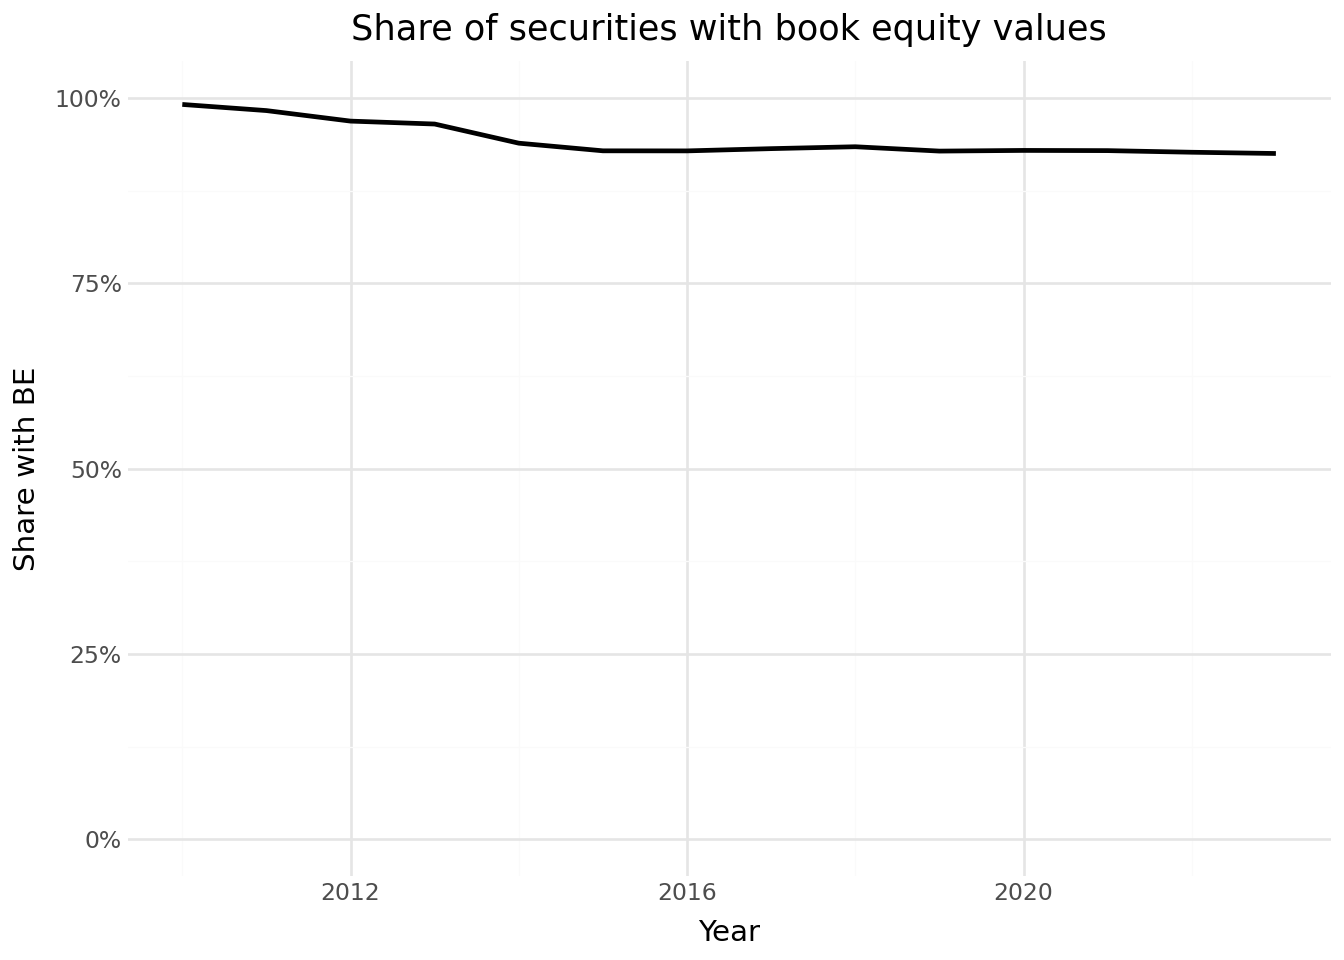

In [30]:
#| label: fig-215
#| fig-cap: The figure shows the end-of-year share of securities with book equity values by listing exchange.
#| fig-alt: 'Title: Share of securities with book equity values by exchange. The figure shows a line chart of end-of-year shares of securities with book equity values by exchange with years on the horizontal axis and the corresponding share on the vertical axis.'

share_with_be = (prices_monthly
  .assign(year=lambda x: pd.DatetimeIndex(x["date"]).year)
  .sort_values("date")
  .groupby(["symbol", "year"])
  .tail(1)
  .reset_index()
  .merge(comp_vn, how="left", on=["symbol", "year"])
  
  # Group by year only for now; easy to add "exchange" later
  .groupby(["year"]) 
  # # .groupby(["exchange", "year"]) # Uncomment this later
  .apply(
    lambda x: pd.Series({
      "share": x["symbol"][x["be"].notnull()].nunique() / x["symbol"].nunique()
    }),
    include_groups=False # Recommended for newer pandas versions
  )
  .reset_index()
)

# Professional visualization check
share_with_be_figure = (
  ggplot(
    share_with_be, 
 
    aes(x="year", y="share") 
    # aes(x="year", y="share", color="exchange", linetype="exchange")
  )
  + geom_line(size=1)
  + labs(
      x="Year", y="Share with BE",
      title="Share of securities with book equity values"
      # title="Share of securities with book equity values by exchange"
    )
  + scale_y_continuous(labels=percent_format())
  + coord_cartesian(ylim=(0, 1))
  + theme_minimal()
)
share_with_be_figure.show()